### Lab 22 - HIV AND AIDS
#### Rex McArthur

### Problem 1 and 2
https://en.wikipedia.org/wiki/HIV/AIDS

HIV is unique cause it doesn't kill people, just makes you vulnerable to other infections. It's a virus so it's not really living, but its dangerous. HIV turns into aids, and that is the real problem.

AIDS can be treated with various medicines. They are expensive and need to be balanced. 

In [34]:
# Dependencies for this lab's code:
from __future__ import division, print_function
import numpy as np
from matplotlib import pyplot as plt
import seaborn

#Code from RK4 Lab with minor edits

def initialize_all(y0, t0, t, n):
    """ An initialization routine for the different ODE solving
    methods in the lab. This initializes Y, T, and h. """
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size)).squeeze()
    else:
        Y = np.empty(n)
        
    Y[0] = y0
    T = np.linspace(t0, t, n)
    h = float(t - t0) / (n - 1)
    return Y, T, h


def RK4(f, y0, t0, t, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    y0 is assumed to be either a constant or a one-dimensional numpy array.
    t and t0 are assumed to be constants.
    f is assumed to accept three arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    The third is an index to the other arrays.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, t, n).
    """
    Y,T,h = initialize_all(y0,t0,t,n)
    for i in xrange(n-1):
        K1 = f(T[i],Y[i],i)
        K2 = f(T[i]+h/2.,Y[i]+h/2.*K1,i)
        K3 = f(T[i]+h/2.,Y[i]+h/2.*K2,i)
        K4 = f(T[i+1],Y[i]+h*K3,i)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2 +2*K3+K4)
    return Y

### Probme 3

In [35]:
a_1, a_2 = 0, 0
b_1, b_2 = 0.02, 0.9
s_1, s_2 = 2., 1.5
mu = 0.002
k = 0.000025
g = 30.
c = 0.007
B_1, B_2 = 14, 1
A_1, A_2 = 250000, 75
T0, V0 = 400, 3
t_f = 50
n = 1000
t0=0

In [36]:
#Initialize global variables
state = np.zeros((n,2))
state0 = np.array([T0, V0])
costate = np.zeros((n,2))
costate0 = np.zeros(2)
u=np.zeros((n,2))
u[:,0] += .02
u[:,1] += .9
# define state equations

def state_equations(t,y,i):
    '''
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the T cell concentration and the Virus concentration at time t
    i : int
    index for the global variable u.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the T cell concentration and the virus ←-
    concentration at time t
    '''
    T,V = y[0], y[1]
    dT = s_1 - (s_2*V)/(B_1 + V) - mu*T - k*V*T + u[i,0]*T 
    dV = ((g*V)/(B_2 + V))*(1-u[i,1]) - c*V*T
    return  np.array([dT,dV])

#print(state_equations(0,state0,0))

In [37]:
def lambda_hat(t,y,i):
    '''
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the lambda values at time tf-t
    i : int
    index for global variables, u and state.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the lambda_hats at time t.
    '''
    # If something is wrong look at i vs -i
    l1, l2 = y[0], y[1]
    l_hat1 = l1*(-mu-k*state[-i,1]+ u[-i,0])- c*l2*state[-i,1]-1
    l_hat2 = -l1*((s_2*B_1)/(B_1+state[-i,1])**2 + k*(state[-i,0])) \
        + l2*((g*B_2*(1-u[-i,1]))/(B_2 + state[-i,1])**2 - c*state[-i,0])
        
    return np.array([l_hat1, l_hat2])


In [38]:
epsilon = 0.001
test = epsilon + 1
time = np.linspace(0,t_f,n)
a_1_vec = np.linspace(a_1,a_1,n)
b_1_vec = np.linspace(b_1,b_1,n)
a_2_vec = np.linspace(a_2,a_2,n)
b_2_vec = np.linspace(b_2,b_2,n)
while(test > epsilon):
    oldu = u.copy();
    #solve the state eq
    
    state = RK4(state_equations,np.array([T0,V0]),t0,t_f,n)
    T,V = state[:,0], state[:,1]
    #solve the costate equations with backwards iteration
    
    # Q's How do we get lambda1, lambda2
    costate = RK4(lambda_hat, np.array([0,0]),t0,t_f,n)[::-1]
    l1, l2 = costate[:,0], costate[:,1]
    
    #solve for u1 and u2
    u_star_1 = -1/(2*A_1) * np.multiply(l1,T)
    u1 = np.minimum(np.maximum(a_1_vec,u_star_1), b_1_vec)
    
    u_star_2 = 1/(2*A_2)* np.multiply(l2, g*V/(B_2 + V))
    u2 = np.minimum(np.maximum(a_2_vec,u_star_2), b_2_vec)
    
    
    #update control
    u[:,0] = 0.5*(u1 + oldu[:,0])
    u[:,1] = 0.5*(u2 + oldu[:,1])
    #test for convergence
    test = abs(oldu - u).sum()

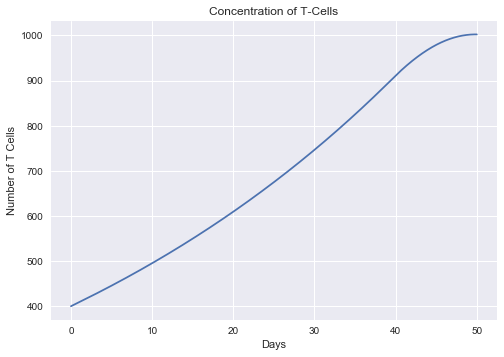

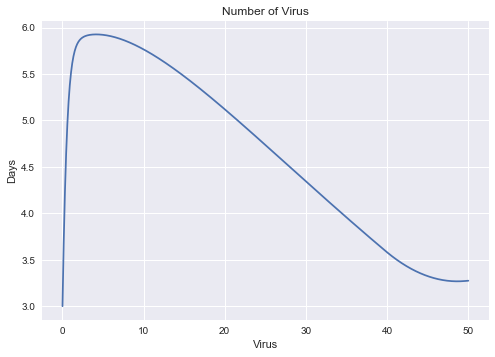

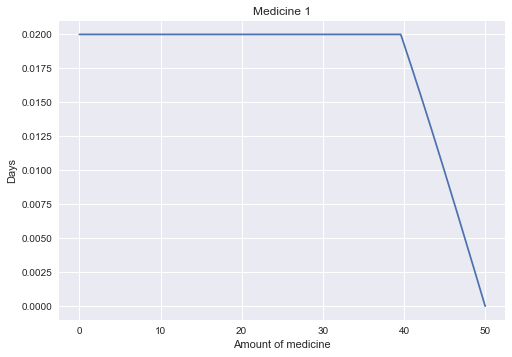

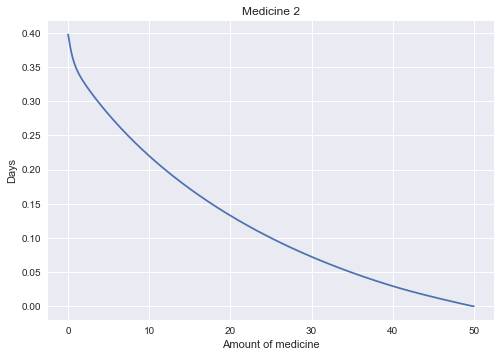

In [43]:
plt.plot(time,T)
plt.title("Concentration of T-Cells")
plt.xlabel('Days')
plt.ylabel('Number of T Cells')
plt.show()

plt.plot(time,V)
plt.title('Number of Virus')
plt.xlabel('Virus')
plt.ylabel('Days')
plt.show()

plt.plot(time,u1)
plt.title('Medicine 1')
plt.xlabel('Amount of medicine')
plt.ylabel('Days')
plt.show()

plt.plot(time,u2)
plt.title('Medicine 2')
plt.xlabel('Amount of medicine')
plt.ylabel('Days')
plt.show()